# Embeddings :
## What is it?
####  Embedding convert text to number representation

## Why is it?
#### When you try to model your text data you cannot feed text to model, model needs numbers. So you convert text to numbers.

## Types of embedding :
1. Word Embedding
2. Sentence Embedding

### Word Embedding
- Word embedding is the collective name for a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.
- It is also a form of dimentionality reduction

### Different methods of word embedding
- Word2Vec(Google 2013)
- Glove(Stanford 2014)
- Fasttext(Facebook 2015)
- Elmo(2018)

- when it comes to language modelling, Most of the time we start with Bag of words model
- Bag of words language modelling technique is old and not that much effective for context based vectors
- Because it gives same importance to every word( that is either 0 or 1)

### check out this link for better understanding of bag of words model
https://machinelearningmastery.com/gentle-introduction-bag-words-model/

#### Now there was a need for a model that can understand context of a word in a sentence for better language modelling

### Word2Vec
#### You can find a handy blog on Word2Vec here
https://towardsdatascience.com/understanding-nlp-word-embeddings-text-vectorization-1a23744f7223#:~:text=Word%20Embeddings%20or%20Word%20vectorization%20is%20a%20methodology,Word%20embeddings%20help%20in%20the%20following%20use%20cases.
- So in 2014 google come up with Word2Vec model
- it uses a shallow neural network to perform vectorization
- it uses two methods to do that(CBOW and Skip Gram)
- it works on next word prediction concept

#### What it Does?
- It converts words to softmax probabilites(a number between 0-1) of a given dimention
- It works on principal as if a words appear in same context in a sentence then they should have similar probabilities
- like king and queen have similar royal properties, but other properties will be different
- man and women have different properties
- So if we do something like
#### Vector(“King”) — Vector(“Man”)+Vector(“Woman”) = Word(“Queen”)
- king = royal+man
- queen = royal+women
- king-man+women =  Queen

#### Problem with Word2Vec
- if a word appears at two different places, it gives same vector for both 
- Since context is different , so vectors also should be different
- ex :  [I read the book yesterday., Can you read the letter now?]
- the 'read' word in both sentence have different context


### The remaining two(Glove , Fasttext) also do vectorization but with different techniques

- find blog on fasttext and glove here

https://dzone.com/articles/glove-and-fasttext-two-popular-word-vector-models

- Glove is based on matrix factorization
- Fasttext is extention of Word2Vec with every word broken in n grams to better capture the context of smaller piece of language



## Elmo

## Table of Contents
- What is ELMo?
- Understanding how ELMo works
- How is ELMo different from other word embeddings?
- Implementation: ELMo for Text Classification in Python
- Understanding the Problem Statement
- About the Dataset
- Import Libraries
- Read and Inspect Data
- Text Cleaning and Pre-processing
- Brief Intro to TensorFlow Hub
- ELMo Vectors Preparation
- Model Building and Evaluation
- What else we can do with ELMo?

### What is ELMO?
- ELMo is a novel way to represent words in vectors or embeddings. These word embeddings are helpful in achieving state-of-the-art (SOTA) results in several NLP tasks

### Understanding how ELMo works
- ELMo word vectors are computed on top of a two-layer bidirectional language model (biLM). This biLM model has two layers stacked together. Each layer has 2 passes — forward pass and backward pass:

#### We can see image representation 


url : https://cdn.analyticsvidhya.com/wp-content/uploads/2019/03/output_YyJc8E.gif

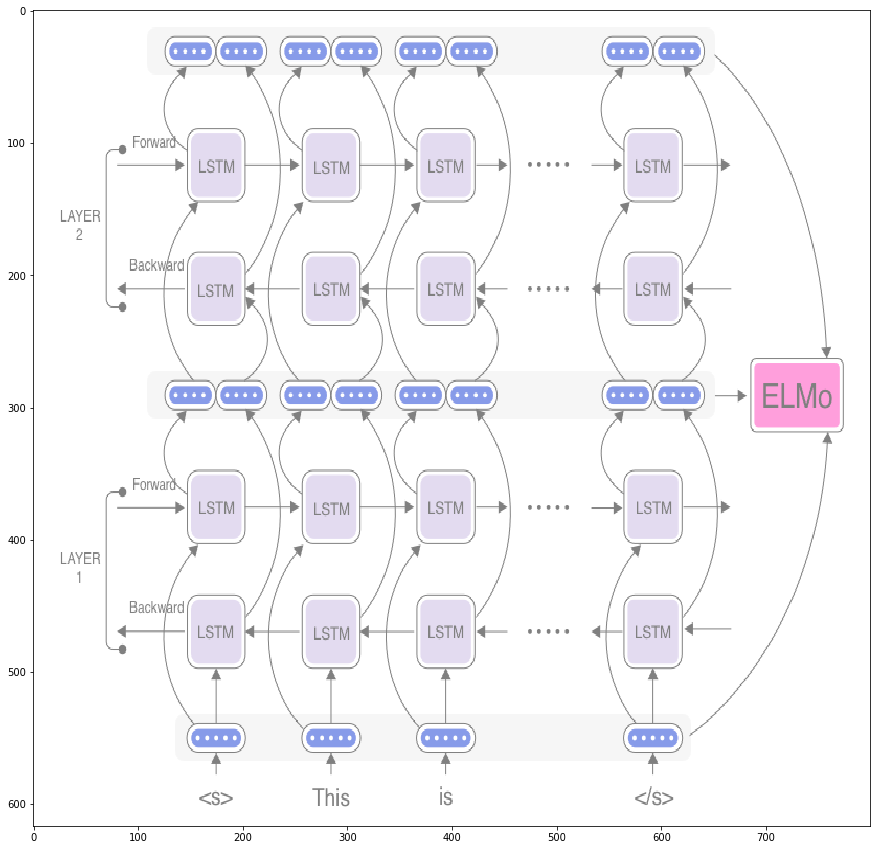

In [138]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
image = io.imread('http://www.realworldnlpbook.com/blog/images/elmo.png')
image.shape
fig = plt.figure(figsize= (15,15))
#subplot = plt.subplot
plt.imshow(image, aspect = 'auto')

- The architecture above uses a character-level convolutional neural network (CNN) to represent words of a text string into raw word vectors
- These raw word vectors act as inputs to the first layer of biLM
- The forward pass contains information about a certain word and the context (other words) before that word
- The backward pass contains information about the word and the context after it
- This pair of information, from the forward and backward pass, forms the intermediate word vectors
- These intermediate word vectors are fed into the next layer of biLM
- The final representation (ELMo) is the weighted sum of the raw word vectors and the 2 intermediate word vectors

- As the input to the biLM is computed from characters rather than words, it captures the inner structure of the word. For example, the biLM will be able to figure out that terms like beauty and beautiful are related at some level without even looking at the context they often appear in. Sounds incredible!

 

### How is ELMo different from other word embeddings?

#### Suppose we have a couple of sentences:

1. I read the book yesterday.
2. Can you read the letter now?



- Take a moment to ponder the difference between these two. The verb “read” in the first sentence is in the past tense. And the same verb transforms into present tense in the second sentence. This is a case of Polysemy wherein a word could have multiple meanings or senses.
- Traditional word embeddings come up with the same vector for the word “read” in both the sentences. Hence, the system would fail to distinguish between the polysemous words. These word embeddings just cannot grasp the context in which the word was used.

- ELMo word vectors successfully address this issue. ELMo word representations take the entire input sentence into equation for calculating the word embeddings. Hence, the term “read” would have different ELMo vectors under different context.

- Contextual: The representation for each word depends on the entire context in which it is used.
- Deep: The word representations combine all layers of a deep pre-trained neural network.
- Character based: ELMo representations are purely character based, allowing the network to use morphological clues to form robust representations for out-of-vocabulary tokens unseen in training.

## About the dataset 

2. Tweets from pages of different mobile companies 

Here’s a breakdown of the dataset we have:

The train set contains 7,920 tweets
The test set contains 1,953 tweets

In [139]:
import pandas as pd
import numpy as np
import spacy
from tqdm import tqdm
import re
import time
import pickle
pd.set_option('display.max_colwidth', 200)
import seaborn as sns

In [29]:
train = pd.read_csv("data_for_elmo/train_2kmZucJ.csv")
test = pd.read_csv("data_for_elmo/test_oJQbWVk.csv")

In [30]:
train.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!


In [31]:
train.shape, test.shape

((7920, 3), (1953, 2))

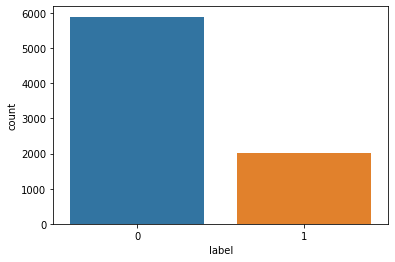

In [32]:
sns.countplot(train.label)

Here, 1 represents a negative tweet while 0 represents a non-negative tweet.

Let’s take a quick look at the first 5 rows in our train set:

In [33]:
train['label'].value_counts(normalize = True)


0    0.744192
1    0.255808
Name: label, dtype: float64

There seem to be quite a few URL links in the tweets. They are not telling us much (if anything) about the sentiment of the tweet so let’s remove them.

In [34]:
# remove URL's from train and test
train['clean_tweet'] = train['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

test['clean_tweet'] = test['tweet'].apply(lambda x: re.sub(r'http\S+', '', x))

We have used Regular Expressions (or RegEx) to remove the URLs.

Note: You can learn more about Regex in this article.

We’ll go ahead and do some routine text cleaning now.

In [35]:
punctuation = '!"#$%&()*+-/:;<=>?@[\\]^_`{|}~'

train['clean_tweet'] = train['clean_tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))
test['clean_tweet'] = test['clean_tweet'].apply(lambda x: ''.join(ch for ch in x if ch not in set(punctuation)))

# convert text to lowercase
train['clean_tweet'] = train['clean_tweet'].str.lower()
test['clean_tweet'] = test['clean_tweet'].str.lower()

# remove numbers
train['clean_tweet'] = train['clean_tweet'].str.replace("[0-9]", " ")
test['clean_tweet'] = test['clean_tweet'].str.replace("[0-9]", " ")

# remove whitespaces
train['clean_tweet'] = train['clean_tweet'].apply(lambda x:' '.join(x.split()))
test['clean_tweet'] = test['clean_tweet'].apply(lambda x: ' '.join(x.split()))

We will lemmatize (normalize) the text by leveraging the popular spaCy library.

In [36]:
# import spaCy's language model
nlp = spacy.load('en', disable=['parser', 'ner'])

# function to lemmatize text
def lemmatization(texts):
    output = []
    for i in texts:
        s = [token.lemma_ for token in nlp(i)]
        output.append(' '.join(s))
    return output

In [37]:
train['clean_tweet'] = lemmatization(train['clean_tweet'])
test['clean_tweet'] = lemmatization(test['clean_tweet'])

In [38]:
train.sample(10)

,id,label,tweet,clean_tweet
2328,2329,0,I love you. #flower #blossom #sky #instadaily #iPhone #taipei #taiwan #pink #streetsnap http://instagram.com/p/m7fv8ULmB8/,i love -PRON- . flower blossom sky instadaily iphone taipei taiwan pink streetsnap
7192,7193,1,"It takes an hour for it to gain 10%, but 10 minutes for it to loose 10%.. Oh. Iphone","-PRON- take an hour for -PRON- to gain , but minute for -PRON- to loose .. oh . iphone"
6765,6766,0,#thankyou #grateful #healthy #2018 #apple #starkinc #blessed @ STARK INC. https://www.instagram.com/p/BdZP4GzhfTv/,thankyou grateful healthy apple starkinc bless stark inc .
2700,2701,0,Support http://myfarewellnote.com by giving us a #follow and #retweeting us #followus #mobile #apps #FF #technology #iphone #SocialMedia #AppStore #follow #followme #gift #charity #SmallBiz #rt #A...,support by give -PRON- a follow and retweete -PRON- followus mobile app ff technology iphone socialmedia appstore follow followme gift charity smallbiz rt apple digital business newappstore androi...
7711,7712,0,Morning light over Simone. My first photo with the new iPhone six plus. #iPhone #photo… http://instagram.com/p/w3-MYYLAoK/,morning light over simone . -PRON- first photo with the new iphone six plus . iphone photo …
3637,3638,1,"@TDrewK77 coming from a tech enthusiast.... I have had an iPhone, have a Droid 3. :P I chose what I preferred.","tdrewk come from a tech enthusiast .... i have have an iphone , have a droid . p i choose what i prefer ."
3463,3464,0,Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow pn((,gain follower rt this must follow -PRON- i follow back follow everyone who rts gain iphone sougofollow pn
7654,7655,0,Got a Sony Xperia z1 today and must say awesome phone and loving it #Sony #XperiaZ1,get a sony xperia z today and must say awesome phone and love -PRON- sony xperiaz
6669,6670,0,Yujuj““I“ioioo“ ippp (@allenchoo) • #LostInTranslation - did you mean you the #iPad or the #iPhone? #Letsfacereality: both #win!,"yujuj““i“ioioo "" ippp allenchoo • lostintranslation do -PRON- mean -PRON- the ipad or the iphone letsfacereality both win"
325,326,0,First Yellow — Steemit https://steemit.com/photography/@foxkoit/first-yellow … #yellow #nature #color #colors #new #story #blog #photo #photos #photography #image #images #sony #sonylens #sonyphot...,first yellow — steemit … yellow nature color color new story blog photo photo photography image image sony sonylen sonyphoto sonyphotos sonyphotography photofeed news top wow cool like look color ...


In [39]:
#!pip install tensorflow_hub

## Disable v2 behaviour of tensorflow

In [40]:
import tensorflow_hub as hub
import tensorflow as tf

In [41]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


## Disable Eager Execution

In [42]:
tf.compat.v1.disable_eager_execution()
elmo = hub.Module("C:\\Users\\mpspa\\Desktop\\purdue\\assignments\\NLP\\data_for_elmo\\elmo_2.tar", trainable=True)


#### I will first show you how we can get ELMo vectors for a sentence. All you have to do is pass a list of string(s) in the object elmo.

In [93]:
x = ["Roasted ants are a popular snack in Columbia"]

# Extract ELMo features 
embeddings = elmo(x,  signature="default", as_dict=True)["elmo"]

embeddings.shape

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


TensorShape([Dimension(1), Dimension(8), Dimension(1024)])

- The output is a 3 dimensional tensor of shape (1, 8, 1024):

- The first dimension of this tensor represents the number of training samples. This is 1 in our case
- The second dimension represents the maximum length of the longest string in the input list of strings. Since we have only 1 string in our input list, the size of the 2nd dimension is equal to the length of the string – 8
- The third dimension is equal to the length of the ELMo vector

In [17]:
def elmo_vectors(x):
  embeddings = elmo(x.tolist(), signature="default", as_dict=True)["elmo"]

  with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sess.run(tf.tables_initializer())
    # return average of ELMo features
    return sess.run(tf.reduce_mean(embeddings,1))

In [18]:
list_train = [train[i:i+100] for i in range(0,train.shape[0],100)]
list_test = [test[i:i+100] for i in range(0,test.shape[0],100)]

In [ ]:
elmo_train = [elmo_vectors(x['clean_tweet']) for x in list_train]
elmo_test = [elmo_vectors(x['clean_tweet']) for x in list_test]

In [20]:
elmo_train_new = np.concatenate(elmo_train, axis = 0)
elmo_test_new = np.concatenate(elmo_test, axis = 0)

### Dump the vectors

In [21]:
# save elmo_train_new
pickle_out = open("data_for_elmo\\elmo_train_03032019.pickle","wb")
pickle.dump(elmo_train_new, pickle_out)
pickle_out.close()

# save elmo_test_new
pickle_out = open("data_for_elmo\\elmo_test_03032019.pickle","wb")
pickle.dump(elmo_test_new, pickle_out)
pickle_out.close()

### Read the vectors

In [120]:
# load elmo_train_new
pickle_in = open("data_for_elmo\\elmo_train_03032019.pickle", "rb")
elmo_train_new = pickle.load(pickle_in)

# load elmo_train_new
pickle_in = open("data_for_elmo\\elmo_test_03032019.pickle", "rb")
elmo_test_new = pickle.load(pickle_in)

In [121]:
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(elmo_train_new, 
                                                  train['label'],  
                                                  random_state=42, 
                                                  test_size=0.2)

In [140]:
elmo_train_new.shape

(7920, 1024)

In [122]:
from sklearn.linear_model import LogisticRegression


lreg = LogisticRegression()
lreg.fit(xtrain, ytrain)

C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [123]:
preds_valid = lreg.predict(xvalid)

In [124]:
#f1_score(yvalid, preds_valid)

In [125]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, precision_recall_curve

In [126]:
print("Accuracy : ", accuracy_score(yvalid, preds_valid))
print("precision : ", precision_score(yvalid, preds_valid))
print("recall : ", recall_score(yvalid, preds_valid))
print("f1 score : ", f1_score(yvalid, preds_valid))
print("confusion : ", metrics.confusion_matrix(yvalid, y_pred_class))

Accuracy :  0.875
precision :  0.7910447761194029
recall :  0.7361111111111112
f1 score :  0.7625899280575541
confusion :  [[1087   65]
 [ 148  284]]


In [127]:
import string


In [128]:
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

## Can we change default dimentions of elmo??  ----------> Yes we can

##  Tfidf version

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [130]:
vectorizer = TfidfVectorizer()
tfidf_train_x = vectorizer.fit_transform(train["clean_tweet"])

In [131]:
tfidf_train_x.shape

(7920, 16724)

In [132]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [133]:
from sklearn.model_selection import train_test_split

xtrain, xvalid, ytrain, yvalid = train_test_split(tfidf_train_x, 
                                                  train['label'],  
                                                  random_state=42, 
                                                  test_size=0.2)

In [134]:
cls.fit(xtrain, ytrain)

LogisticRegression()

In [135]:
y_pred_class = cls.predict(xvalid)

In [137]:
# print the confusion matrix
from sklearn import metrics
print("accuracy",metrics.accuracy_score(yvalid, y_pred_class))
print("precision",metrics.precision_score(yvalid, y_pred_class))
print("recall",metrics.recall_score(yvalid, y_pred_class))
print("f1",metrics.f1_score(yvalid, y_pred_class))
#print("confusion",metrics.confusion_matrix(yvalid, y_pred_class))

accuracy 0.865530303030303
precision 0.8137535816618912
recall 0.6574074074074074
f1 0.7272727272727273
